In [1]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import scipy.stats as ss
from scipy.optimize import curve_fit
plt.rc("font", family=["Helvetica", "Arial"]) # skifter skrifttype
plt.rc("axes", labelsize=22)   # skriftstørrelse af `xlabel` og `ylabel`
plt.rc("xtick", labelsize=22, top=True, direction="out")
plt.rc("ytick", labelsize=22, right=True, direction="out")
plt.rc("axes", titlesize=22)
plt.rc("legend", fontsize=18)
plt.rcParams["figure.figsize"] = (8, 6)

In [2]:
def flatten_array(arr):
    return np.concatenate(arr, axis=0)
def flatten_array_old(arr):
    flattened = []
    for sub in arr[:]:
        flattened = np.concatenate((flattened, sub))
    return flattened
def reject_outliers(data, x, m=5):
    idxs = abs(data - np.mean(data)) < m * np.std(data)
    return data[idxs], x[idxs]
def gaussian(x, amplitude, mean, standard_deviation):
    return amplitude * np.exp( - (x - mean)**2 / (2*standard_deviation ** 2))
def num_of_tracks_in_vtxs(vertex_tracks_idx):
    res = []
    for event in vertex_tracks_idx:
        event_ns = []
        for vertex_tracks in event:
            n = len(vertex_tracks)
            event_ns.append(n)
        res.append(event_ns)
    return np.array(res, dtype='object')

def getFirstElem(event_params):
    first_elems = []
    for event_param in event_params:
        first_elems.append(event_param[0])
    return np.array(first_elems)
        

In [3]:
files = ['ntuples_condor/OutDir_{}/hist-Rel21sample.root'.format(i) for i in range(1, 10)]
reco_v_sum_pt2 = np.array([], dtype='object')

for file in files:
    root_file = uproot.open(file)
    for key in root_file.keys():
        if key.startswith('EventTree'):
            tree = root_file[key]
            reco_v_sum_pt2 = np.concatenate((reco_v_sum_pt2, tree['recovertex_sumPt2'].array(library='np')))

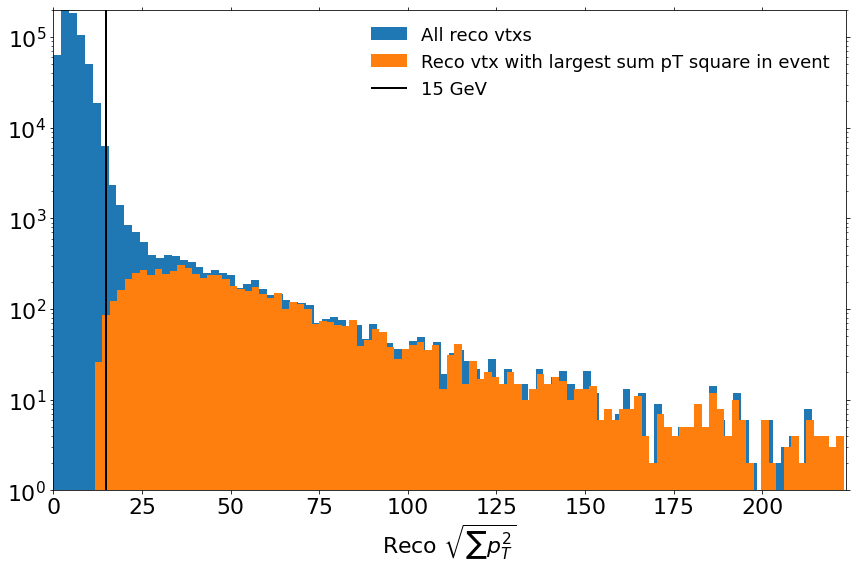

In [11]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 8)

sum_pt2_range = 5e4

idxs = getFirstElem(reco_v_sum_pt2)   < sum_pt2_range
idxs2 = flatten_array(reco_v_sum_pt2) < sum_pt2_range
_ = ax.hist(np.sqrt(flatten_array(reco_v_sum_pt2)[idxs2]), bins=100, label='All reco vtxs')
_ = ax.hist(np.sqrt(getFirstElem(reco_v_sum_pt2)[idxs]), bins=100, label='Reco vtx with largest sum pT square in event')
ax.vlines(15, 1e-0, 1e7, 'k', lw=2, zorder=10, label='15 GeV')

ax.set_ylim(1, 2e5)
ax.set_xlim(0, sum_pt2_range**0.5)
ax.set_yscale('log')
ax.set_xlabel('Reco $\\sqrt{\\sum p_T^2}$')
ax.legend(frameon=False)
fig.tight_layout()